## Multiclass Classification & Neural Networks

In [1]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import scipy.optimize as opt
%matplotlib notebook

In [2]:
data = loadmat('./ex3/ex3data1.mat');

In [3]:
X = pd.DataFrame(data['X']); y = pd.DataFrame(data['y']);

In [4]:
def load_images(ax):
    for i in range(10):
        for j in range(10):
            random_img = np.array(X.iloc[np.random.randint(X.shape[0])])
            img = random_img.reshape((20,20), order='F');
            ax[i,j].imshow(img)
            ax[i,j].axis('off')

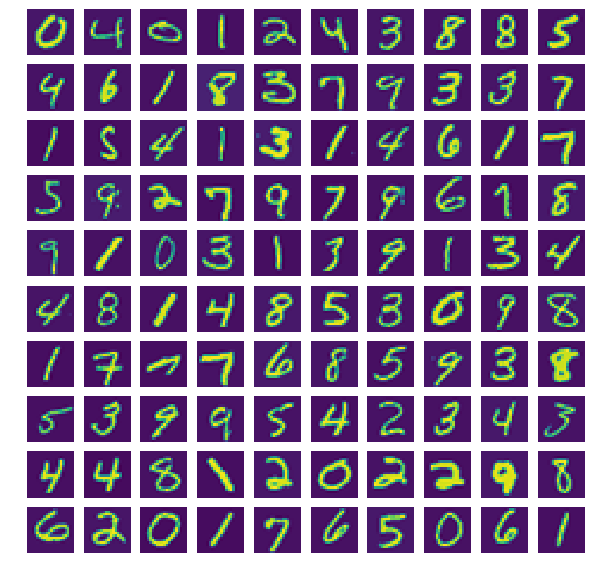

In [5]:
fig, ax = plt.subplots(10,10,figsize=(10,10));
load_images(ax)

In [6]:
ones = np.ones((len(X),1))

In [7]:
X = np.hstack([ones, X]); X.shape

(5000, 401)

In [8]:
thetas = np.zeros((X.shape[1],1)); thetas.shape

(401, 1)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def h(X, thetas):
    return sigmoid(X @ thetas)

In [11]:
def cost_function(X, y, theta):
    h_x = h(X, thetas)
    pos = y * np.log(h_x)
    neg = (1-y) * np.log(1-h_x)
    error = pos + neg
    cost = -np.sum(error)
    return cost

In [12]:
def reg_term(thetas, lmbda):
    theta_sum = np.sum(thetas[1:] ** 2)
    return lmbda * theta_sum

In [20]:
def reg_cost(thetas, lmbda, X, y):
    m = y.size
    h_x = h(X, thetas)
    J = -1*(1/m)*(np.log(h_x).T.dot(y)+np.log(1-h_x).T.dot(1-y)) + (lmbda/(2*m))*np.sum(np.square(thetas[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

In [28]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(thetas[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0]) 

In [29]:
def grad_descent(thetas, X, y):
    m = len(X)
    h_x = h(X, thetas)
    error = h_x - y
    cost = X.T @ error
    return (1/m * cost)

In [30]:
def reg_grad_descent(thetas):
    X,y, lmbda = args[0], args[1], args[2]
    reg_term = np.zeros((X.shape[1],1))
    grad = grad_descent(X,y,thetas)
    reg_term[1:] = (lmbda / m) * thetas[1:]
    return grad + reg_term

In [31]:
def lrgradientReg(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

### Example Solutions

In [32]:
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


#### One vs All Classification

In [33]:
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                        jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [34]:
theta_res = oneVsAll(X, y, 10, 0.1); 

In [38]:
X.shape

(5000, 401)

In [72]:
def predictOneVsAll(thetas, X):
    predictions = X @ thetas.T
    return np.argmax(predictions, axis=1)+1

In [73]:
preds = predictOneVsAll(theta_res, X);

In [77]:
accuracy = np.average(y == preds[:, None]); accuracy * 100

93.2

## Neural Networks

In [170]:
weights = loadmat('./ex3/ex3weights.mat');

In [171]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

### Feedforward Propagation and Prediction

In [172]:
data = loadmat('./ex3/ex3data1.mat');
X = pd.DataFrame(data['X']); y = pd.DataFrame(data['y']);

In [173]:
input_layer_size = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

In [174]:
print(f'Theta1 has size: {theta1.shape}')
print(f'Theta2 has size: {theta2.shape}')


Theta1 has size: (25, 401)
Theta2 has size: (10, 26)


In [175]:
X = np.hstack([np.ones((X.shape[0], 1)), X]); 

In [176]:
a_1 = X; a_1 = a_1.reshape((401, -1)); 

In [177]:
z_2 = theta1 @ a_1; 

In [178]:
print(f'a_1 has size: {a_1.shape}')
print(f'z_2 has size: {z_2.shape}')

a_1 has size: (401, 5000)
z_2 has size: (25, 5000)


In [179]:
# Add in bias to hidden layer
a_0 = np.ones((1, z_2.shape[1]));

In [180]:
z_2 = np.vstack([a_0, z_2]); z_2.shape

(26, 5000)

In [181]:
a_2 = sigmoid(z_2); a_2.

SyntaxError: invalid syntax (<ipython-input-181-d0b501bf4883>, line 1)

In [182]:
print(f'Theta1 has size: {theta1.shape}')
print(f'Theta2 has size: {theta2.shape}')
print(f'a_1 has size: {a_1.shape}')
print(f'z_2 has size: {z_2.shape}')
print(f'a_2 has size: {a_2.shape}')

Theta1 has size: (25, 401)
Theta2 has size: (10, 26)
a_1 has size: (401, 5000)
z_2 has size: (26, 5000)
a_2 has size: (26, 5000)


In [183]:
z_3 = theta2 @ a_2; a_3 = sigmoid(z_3)

In [184]:
a_3 = a_3.reshape((5000,10))

In [188]:
X.shape

(5000, 401)

In [195]:
X = pd.DataFrame(data['X']); y = pd.DataFrame(data['y']);

In [203]:
theta1.shape

(25, 401)

In [248]:
def predict_nn(theta1, theta2, X):
    m = X.shape[0]
    X = np.hstack([np.ones((m,1)),X])
    a2 = sigmoid(theta1 @ X.T)
    a2 = np.vstack((np.ones((1,m)), a2)) # hidden layer
    a3 = sigmoid(theta2 @ a2)
    return np.argmax(a3, axis=0) + 1

In [249]:
preds = predict_nn(theta1, theta2, X)

In [257]:
accuracy = np.average(preds[:, None] == y); accuracy * 100

97.52